In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [1]:
import pandas as pd
cars = pd.read_csv('Toyoto_Corrola.csv')
cars

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [5]:
cars1 = cars.drop(columns=["Model", "Id"])
cars1

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025
1432,10845,72,19000,86,3,4,5,1015
1433,8500,71,17016,86,3,4,5,1015
1434,7250,70,16916,86,3,4,5,1015


In [7]:
cars1.rename (columns = {'Age_08_04' : 'Age' }, inplace = True)
cars1

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025
1432,10845,72,19000,86,3,4,5,1015
1433,8500,71,17016,86,3,4,5,1015
1434,7250,70,16916,86,3,4,5,1015


In [9]:
# Check for null values
cars1.isna().sum()

Price        0
Age          0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [15]:
# Checking the duplicated rows
cars1[cars1. duplicated (keep=False ) ]

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
112,24950,8,13253,116,5,4,5,1320
113,24950,8,13253,116,5,4,5,1320


#### Observations
- There are no NULL values
- There are duplicated rows with index112 ans 113
- The continuous variable columns: Price, Age, KM, HP and Weight
- The categorical columns are Doors, Cylinders and Gears
- The Price column is the predicted (y) variable

In [20]:
cars1[cars1.duplicated()]

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight


In [18]:
cars1.drop_duplicates(keep='first', inplace = True)
cars

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


<Axes: >

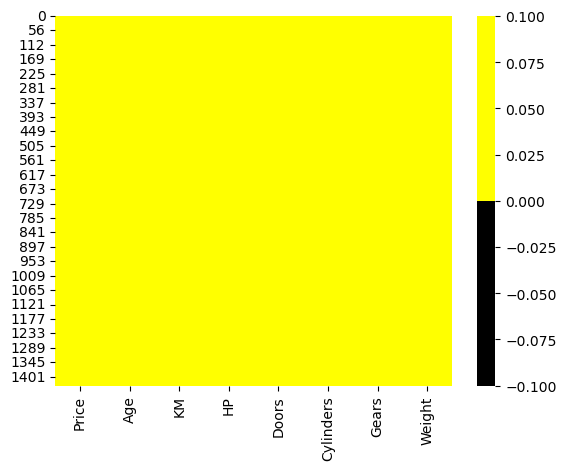

In [26]:
# Visualize data1 missing values using graph

cols = cars1.columns 
colours = ['black', 'yellow'] 
sns.heatmap(cars1[cols].isnull(),cmap=sns.color_palette(colours),cbar = True)

In [28]:
cars1.reset_index(drop=True)
cars1

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025
1432,10845,72,19000,86,3,4,5,1015
1433,8500,71,17016,86,3,4,5,1015
1434,7250,70,16916,86,3,4,5,1015


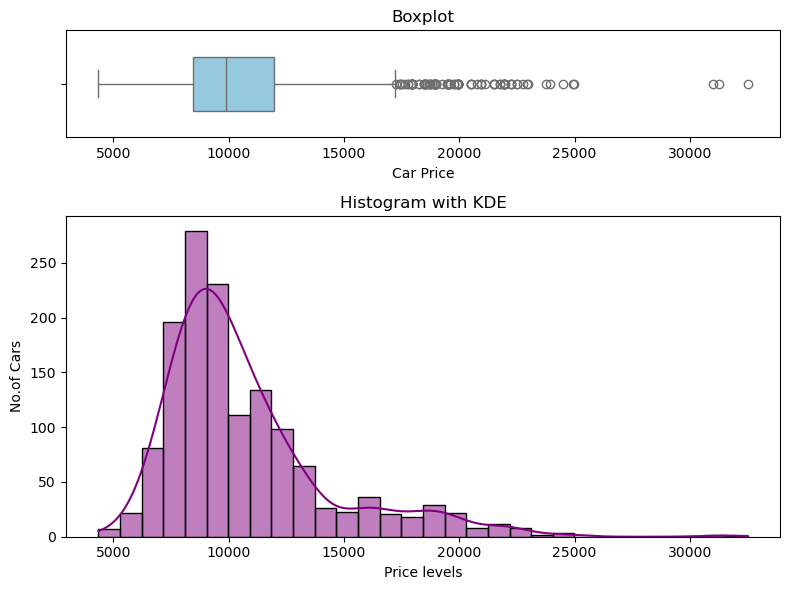

In [32]:
# Create a figure with two subplots, Stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

# Plot the boxplot in the first (top) subplot
sns.boxplot(data=cars1["Price"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes [0].set_title("Boxplot")
axes [0].set_xlabel("Car Price")

# Plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(cars1["Price"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Price levels")
axes[1].set_ylabel("No.of Cars")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt. show()